In [1]:
from glob import glob
from os.path import join,exists,basename,dirname
from rasterio.merge import merge
import numpy as np
import subprocess
import shlex

In [2]:
lidar_dir = '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models'
tiff_dir = join(lidar_dir, 'tiffs')
out_fp = '../../data/lidar/banner/snow_on.tiff'

In [7]:
l = sorted(glob(join(lidar_dir, '*/*.adf')))
l

['../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/dblbnd.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/hdr.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/prj.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/sta.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/w001001.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/w001001x.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/dblbnd.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/hdr.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/prj.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/sta.adf',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/w001001.adf',
 '../../Lidar

In [5]:
l = sorted(glob(join(lidar_dir, 'be_bsmt_*/')))
l

['../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_001/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_002/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_003/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_004/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_005/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_006/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_007/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_008/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_009/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_010/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_011/',
 '../../Lidar_Snippets_Banner/Bare_Earth_Digital_Elevation_Models/be_bsmt_012/',
 '../../Lidar_Snippets_Banne

In [68]:
for i, d in enumerate(l):
        in_fp = join(d, 'w001001.adf')
        out_fp = join(tiff_dir, basename(d[:-1])+'.tiff')
        cmd = shlex.split(f'gdal_translate -of GTiff {in_fp} {out_fp}')
        subprocess.run(cmd, stdout= subprocess.PIPE)

In [69]:
src_files_to_mosaic = []
for tiff in glob(join(tiff_dir, '*.tiff')):
    src = rasterio.open(tiff)
    src_files_to_mosaic.append(src)

mosaic, out_trans = merge(src_files_to_mosaic)

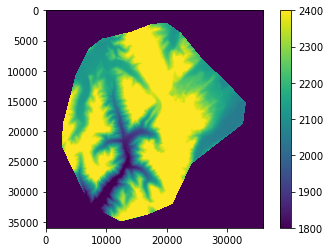

In [72]:
plt.imshow(mosaic[0], vmin = 1800, vmax= 2400)
plt.colorbar()

In [78]:
output_meta = src.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans,
    }
)

with rasterio.open(out_fp, 'w', **output_meta) as m:
    m.write(mosaic)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 36000, 'height': 36000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["UTM Zone 11, Northern Hemisphere",GEOGCS["Unknown datum based upon the GRS 1980 ellipsoid",DATUM["Not_specified_based_on_GRS_1980_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6019"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4019"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.5, 0.0, 636000.0,
       0.0, -0.5, 4912500.0), 'tiled': False, 'interleave': 'band'}


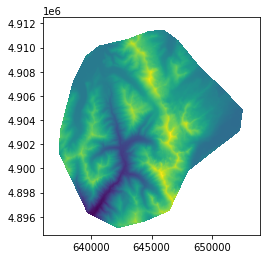

In [79]:
with rasterio.open(out_fp) as src:
    print(src.profile)
    show(src)

In [80]:
out_fp

'../../data/lidar/banner/snow_on.tiff'

In [81]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'
with rasterio.open(out_fp) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(out_fp.replace('.tiff','_wgs84.tiff'), 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [83]:
with rasterio.open(out_fp.replace('.tiff','_wgs84.tiff')) as src:
    print(src.profile)
    show(src)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 42552, 'height': 30575, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(5.414920251330216e-06, 0.0, -115.29822922297686,
       0.0, -5.414920251330216e-06, 44.35302687413477), 'tiled': False, 'interleave': 'band'}
